## Binomial distribution

#### Task: Draw samples from a Binomial distribution and visualise them
- a straightforward way: use a library like [numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html)
- a fun way: simulate data by hands

In [1]:
n = 100
p = 0.2

First, simulate a biased coin with probability of Head as $p$.

In [2]:
from random import random

def flip_coin(p):
    'Return H or T with probability of H as p.'
    return 'H' if random() <= p else 'T'

In [3]:
flip_coin(p)

'T'

Test by flipping the coin 100 times.

In [9]:
from collections import Counter

coins = [flip_coin(p) for _ in range(100)]
print(coins)
print(Counter(coins))

['H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H']
Counter({'T': 78, 'H': 22})


Flip the coin $n$ times to simulate Binomial distributed data.

In [11]:
def run_experiment(n, p):
    'Flip the coins n times and return the number of heads.'
    coins = [flip_coin(p) for _ in range(n)]
    return Counter(coins)['H']

In [12]:
run_experiment(n, p)

16

The result of each experiment is a sample drawn from a Binomial distribution $B(n,p)$.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_barchart(data):
    counts = Counter(data)
    plt.bar(counts.keys(), counts.values(), width=0.9)
    plt.show()    

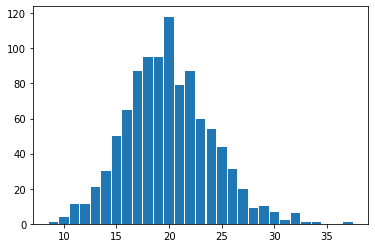

In [14]:
sample_size = 1000
data = [run_experiment(n, p) for _ in range(sample_size)] 
draw_barchart(data)

Just to double check with `numpy` library.

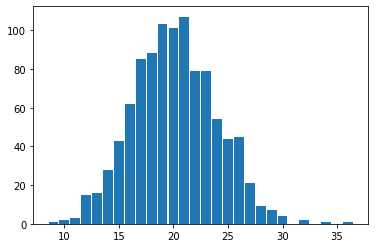

In [15]:
import numpy as np
data = np.random.binomial(n=n, p=p, size=sample_size)
draw_barchart(data)

## Q-Q Plot

#### Task: Draw a qq plot

First, generate 100 random numbers following the standard normal distribution.

In [16]:
data = np.random.normal(0, 1, 100)
data

array([ 0.77430869, -1.46865927, -1.71043576,  0.356921  ,  1.5376998 ,
        0.17789004, -1.8947537 ,  0.22221953, -1.04507286, -0.06111502,
        0.93853537, -2.28368409, -1.58961287, -1.05683548,  0.10045367,
        0.60583994,  0.38056964, -0.06323351,  0.13890642,  0.76204487,
        1.52846609, -0.1438561 , -0.35248457,  0.46339654,  0.99976908,
       -0.34647215,  0.40842762, -0.66711752, -0.96827275, -1.25992621,
        0.19248653,  0.75853484,  0.04700852, -0.58096223,  0.49377443,
        0.1391175 ,  1.21675729, -0.57868192, -1.11908663,  0.14415143,
        0.23359909,  0.42708864,  0.15611708,  0.14786236, -0.77095853,
       -0.76099631, -0.33726721, -0.71934905,  0.52731587,  0.52716798,
        0.5427077 , -0.39567042,  0.48470395,  0.45315612,  2.23637629,
       -0.35585573, -2.05734451, -1.68762338,  0.38018543, -1.00316307,
        0.15817831,  2.21121871, -0.12527744,  0.45012949,  1.1845669 ,
       -0.19511696,  0.01474174, -0.39360904, -0.44373084,  1.26

In [17]:
sorted_data = sorted(data)
sorted_data

[-2.283684085787372,
 -2.0573445105691057,
 -2.016923998110705,
 -1.8947536955447852,
 -1.7104357623494102,
 -1.6876233826855604,
 -1.6271261818677984,
 -1.589612873943174,
 -1.4957526711861484,
 -1.468659267179325,
 -1.259926206878418,
 -1.1190866254366834,
 -1.1174914311422386,
 -1.0568354805693612,
 -1.0450728579602426,
 -1.0031630664062847,
 -0.9682727508289823,
 -0.8080502158283596,
 -0.7709585329316652,
 -0.7609963059717588,
 -0.7357854101338953,
 -0.7193490496328648,
 -0.6671175231783114,
 -0.6218243563245849,
 -0.5809622344846291,
 -0.5786819180633882,
 -0.44373084214809366,
 -0.3956704215256808,
 -0.3936090377621975,
 -0.35585573003345694,
 -0.35248456823685054,
 -0.34647214590562075,
 -0.3372672115180765,
 -0.19511696061217174,
 -0.16054356897606042,
 -0.15664948308874538,
 -0.14385610244776836,
 -0.12527744264924012,
 -0.0632335124042451,
 -0.06111501918650478,
 -0.05590927530716384,
 0.014741741892806774,
 0.04700851706390216,
 0.04760678006478283,
 0.10045366950066605,
 0.

We need to find the theoretical quantiles of the normal distribution. We expect 100 random numbers that follow a normal distribution should be evenly distributed in the 'bell shape'. We split the distribution into 100 equal segments and find the z-score corresponding to each (middle of the) segment.

In [18]:
sampling_points = (np.arange(100) + 0.5) / 100
sampling_points

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

We use scipy to compute the z-score.

In [19]:
import scipy.stats as st
sampling_theoretical_quantiles = [st.norm.ppf(p) for p in sampling_points]
sampling_theoretical_quantiles

[-2.575829303548901,
 -2.1700903775845606,
 -1.9599639845400545,
 -1.8119106729525978,
 -1.6953977102721358,
 -1.5981931399228175,
 -1.5141018876192835,
 -1.4395314709384563,
 -1.372203808998726,
 -1.3105791121681285,
 -1.2535654384704504,
 -1.200358858030859,
 -1.1503493803760079,
 -1.1030625561995975,
 -1.0581216176847767,
 -1.0152220332170279,
 -0.9741138770593092,
 -0.9345892910734802,
 -0.8964733640019162,
 -0.8596173642419115,
 -0.8238936303385574,
 -0.7891916526582226,
 -0.7554150263604693,
 -0.7224790519280627,
 -0.6903088239330339,
 -0.6588376927361878,
 -0.6280060144375695,
 -0.5977601260424784,
 -0.5680514983389829,
 -0.5388360302784503,
 -0.5100734569685949,
 -0.4817268495847303,
 -0.45376219016987945,
 -0.4261480078412781,
 -0.39885506564233686,
 -0.37185608938507475,
 -0.34512553147047237,
 -0.31863936396437514,
 -0.2923748962268042,
 -0.26631061320409494,
 -0.2404260311423079,
 -0.21470156800174456,
 -0.18911842627279252,
 -0.16365848623314128,
 -0.13830420796140452,
 -0

Now, just plot them in a scatter plot.

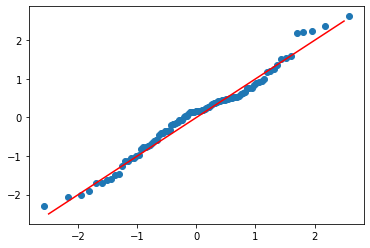

In [20]:
plt.scatter(sampling_theoretical_quantiles, sorted_data)
plt.plot([-2.5, 2.5], [-2.5, 2.5], 'r')
plt.show()

Again, double check with a library. This time, it is [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html).

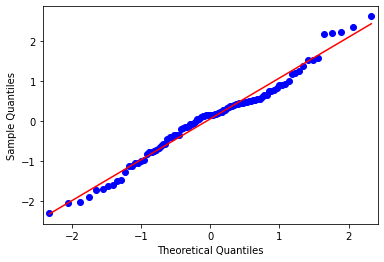

In [22]:
import statsmodels.api as sm

sm.qqplot(data, line='r')
plt.show()

A bonus third way, we draw our data against another empirical normal distribution, with very different parameters. And we still see the points following a straight line!

In [ ]:
another_normal_data = np.random.normal(10, 101, 100)
plt.scatter(sorted(another_normal_data), sorted_data)
plt.show()